In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
# Define the path to the dataset
data_path = "C:\\Users\\ryanb\\Downloads\\m5-forecasting-accuracy\\"

# Load the sales data
sales = pd.read_csv(data_path + 'sales_train_validation.csv')

# Load the calendar data
calendar = pd.read_csv(data_path + 'calendar.csv')

# Load the sell prices data
sell_prices = pd.read_csv(data_path + 'sell_prices.csv')


In [3]:
# Sales data
print("Sales Data:")
print(sales.head())
print(sales.info())

# Calendar data
print("\nCalendar Data:")
print(calendar.head())
print(calendar.info())

# Sell prices data
print("\nSell Prices Data:")
print(sell_prices.head())
print(sell_prices.info())


Sales Data:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_191

In [4]:
#Exploratory Data Analysis
# Melt the sales dataframe to long format
sales_long = sales.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                        var_name='day',
                        value_name='sales')

# Extract the day number
sales_long['day'] = sales_long['day'].str.replace('d_', '').astype(int)

print(sales_long.head())


                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales  
0       CA    1      0  
1       CA    1      0  
2       CA    1      0  
3       CA    1      0  
4       CA    1      0  


In [5]:
# Merge sales data with calendar data
# Remove the 'd_' prefix from the 'd' column and convert to integer
calendar['d'] = calendar['d'].str.replace('d_', '').astype(int)

sales_calendar = pd.merge(sales_long, calendar, left_on='day', right_on='d')

# Check the results
print(sales_calendar.head())


                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales        date  wm_yr_wk  ... month  year  d  \
0       CA    1      0  2011-01-29     11101  ...     1  2011  1   
1       CA    1      0  2011-01-29     11101  ...     1  2011  1   
2       CA    1      0  2011-01-29     11101  ...     1  2011  1   
3       CA    1      0  2011-01-29     11101  ...     1  2011  1   
4       CA    1      0  2011-01-29     11101  ...     1  2011  1   

   event_name_1  event_type_1 event_name_2 event_type_2 snap_CA snap_TX  \
0           NaN           NaN      

          item_id    sales
702   FOODS_3_090  1002529
1198  FOODS_3_586   920242
864   FOODS_3_252   565299
1167  FOODS_3_555   491287
1325  FOODS_3_714   396172


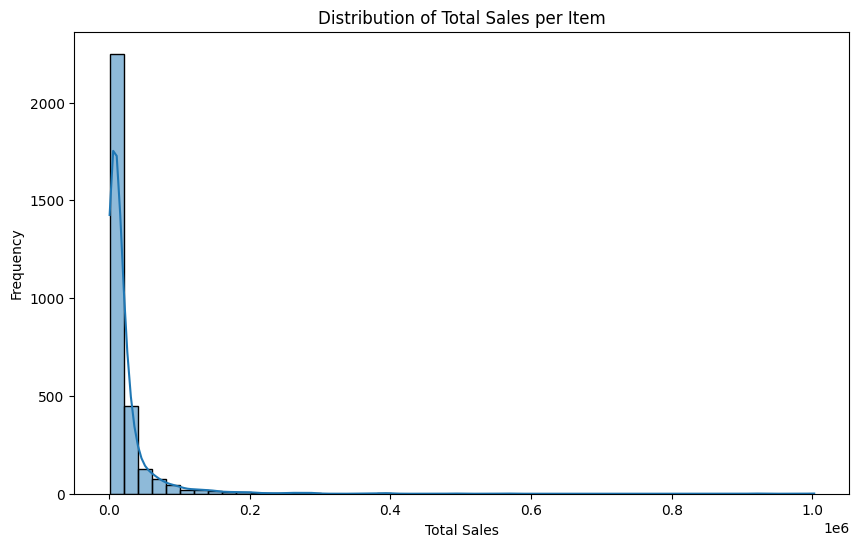

In [6]:
# Total sales per item
total_sales = sales_calendar.groupby('item_id')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
print(total_sales.head())

# Sales distribution
plt.figure(figsize=(10,6))
sns.histplot(total_sales['sales'], bins=50, kde=True)
plt.title('Distribution of Total Sales per Item')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


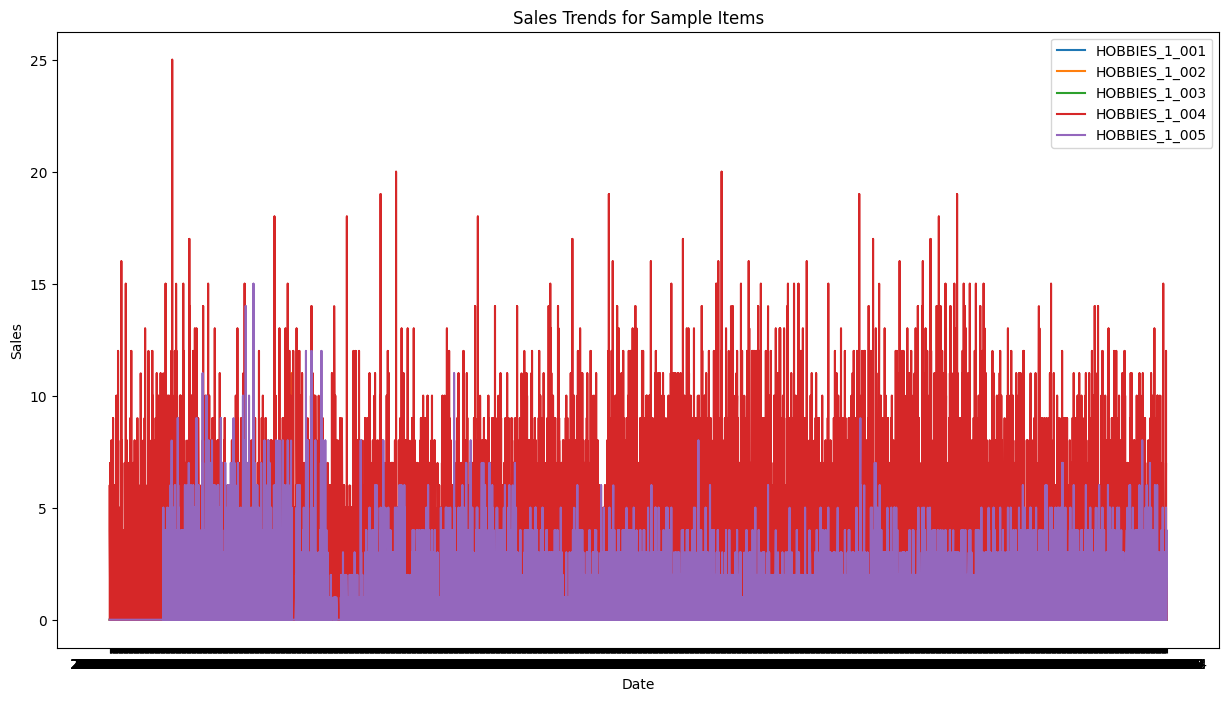

In [7]:
# Select a few items
sample_items = sales_calendar['item_id'].unique()[:5]

plt.figure(figsize=(15,8))
for item in sample_items:
    item_data = sales_calendar[sales_calendar['item_id'] == item]
    plt.plot(item_data['date'], item_data['sales'], label=item)

plt.title('Sales Trends for Sample Items')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


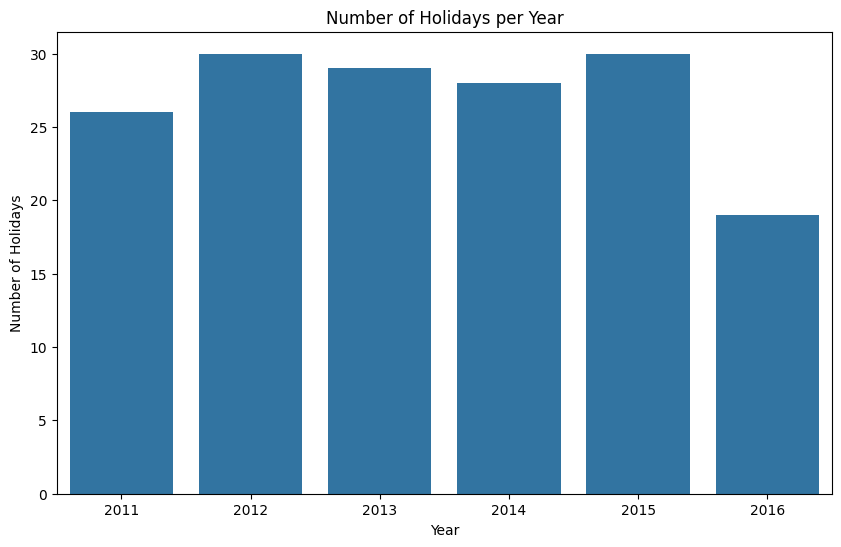

In [8]:
# Number of holidays per year
# Filter rows where an event (holiday) is present in event_name_1
holidays = calendar[~calendar['event_name_1'].isna()]

# Count holidays per year
holidays_per_year = holidays.groupby('year')['d'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='year', y='d', data=holidays_per_year)
plt.title('Number of Holidays per Year')
plt.xlabel('Year')
plt.ylabel('Number of Holidays')
plt.show()


        wday     sales
0     Friday  0.990653
1     Monday  1.348968
2   Saturday  1.122531
3     Sunday  1.362640
4   Thursday  0.984258
5    Tuesday  1.077500
6  Wednesday  0.996024


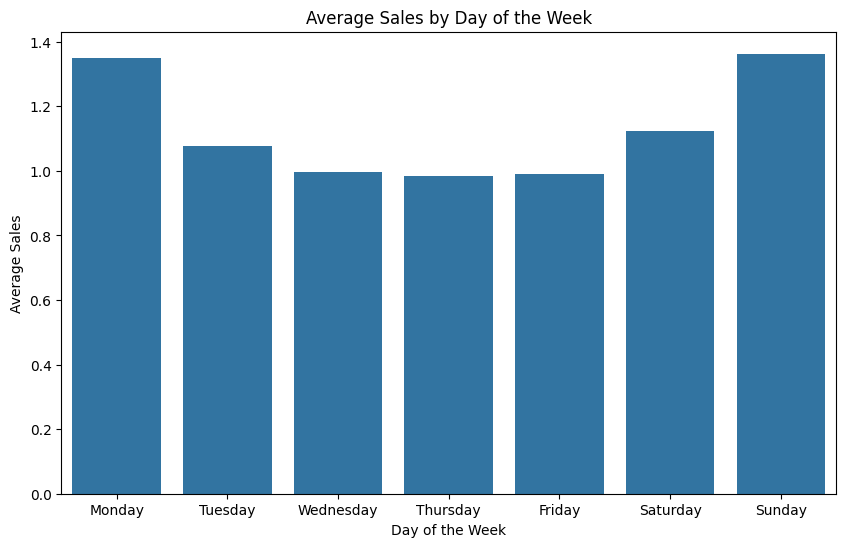

In [10]:

# If the wday column is stored as an integer (1-7), map it to days of the week
day_map = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
sales_calendar['wday'] = sales_calendar['wday'].map(day_map)

# Recalculate average sales by day of the week
avg_sales_dow = sales_calendar.groupby('wday')['sales'].mean().reset_index()
print(avg_sales_dow)
# Plot the data again
plt.figure(figsize=(10,6))
sns.barplot(x='wday', y='sales', data=avg_sales_dow, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()


In [11]:
# Convert 'date' to datetime
sales_calendar['date'] = pd.to_datetime(sales_calendar['date'])

# Extract additional date features
sales_calendar['year'] = sales_calendar['date'].dt.year
sales_calendar['month'] = sales_calendar['date'].dt.month
sales_calendar['day_of_month'] = sales_calendar['date'].dt.day
sales_calendar['week_of_year'] = sales_calendar['date'].dt.isocalendar().week
sales_calendar['quarter'] = sales_calendar['date'].dt.quarter
sales_calendar['is_weekend'] = sales_calendar['date'].dt.dayofweek >= 5

print(sales_calendar.head())


                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales       date  wm_yr_wk  ... event_type_1 event_name_2  \
0       CA    1      0 2011-01-29     11101  ...          NaN          NaN   
1       CA    1      0 2011-01-29     11101  ...          NaN          NaN   
2       CA    1      0 2011-01-29     11101  ...          NaN          NaN   
3       CA    1      0 2011-01-29     11101  ...          NaN          NaN   
4       CA    1      0 2011-01-29     11101  ...          NaN          NaN   

   event_type_2  snap_CA  snap_TX snap_WI day_of_m

In [12]:
# Sort the data
sales_calendar = sales_calendar.sort_values(['item_id', 'store_id', 'date'])

# Create lag features (e.g., sales from previous 7 days)
sales_calendar['sales_lag_7'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].shift(7)
sales_calendar['sales_lag_14'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].shift(14)

print(sales_calendar.head(15))


                                 id      item_id  dept_id cat_id store_id  \
1612    FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
32102   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
62592   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
93082   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
123572  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
154062  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
184552  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
215042  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
245532  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
276022  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
306512  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
337002  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   

In [13]:
# Apply rolling mean and std to the grouped data, but instead of resetting the index,
# align the result to the original DataFrame using a `transform` call.
sales_calendar['rolling_mean_7'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].transform(lambda x: x.rolling(window=7).mean())
sales_calendar['rolling_std_7'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].transform(lambda x: x.rolling(window=7).std())

print(sales_calendar.head(15))


                                 id      item_id  dept_id cat_id store_id  \
1612    FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
32102   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
62592   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
93082   FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
123572  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
154062  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
184552  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
215042  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
245532  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
276022  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
306512  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   
337002  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1   

In [14]:
# Assuming 'event_name_1' indicates holidays/events
sales_calendar['is_holiday'] = ~sales_calendar['event_name_1'].isna()

# Print the first few rows to verify
print(sales_calendar[['date', 'event_name_1', 'is_holiday']].head())


             date event_name_1  is_holiday
1612   2011-01-29          NaN       False
32102  2011-01-30          NaN       False
62592  2011-01-31          NaN       False
93082  2011-02-01          NaN       False
123572 2011-02-02          NaN       False


In [15]:
# Check for missing values
missing_values = sales_calendar.isnull().sum()
print(missing_values[missing_values > 0])

# Strategy: Drop rows with missing values
sales_calendar_clean = sales_calendar.dropna()

print(f"Original rows: {len(sales_calendar)}, After cleaning: {len(sales_calendar_clean)}")


event_name_1      53631910
event_type_1      53631910
event_name_2      58205410
event_type_2      58205410
sales_lag_7         213430
sales_lag_14        426860
rolling_mean_7      182940
rolling_std_7       182940
dtype: int64
Original rows: 58327370, After cleaning: 121960


In [16]:
# Define numerical features that may need scaling
numerical_features = ['sales', 'rolling_mean_7', 'rolling_std_7', 'lag_7', 'lag_14']  # Example features

# Define your target column if not done already
target = 'sales'


In [18]:
# Create lag features (7-day and 14-day lags)
sales_calendar['lag_7'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].shift(7)
sales_calendar['lag_14'] = sales_calendar.groupby(['item_id', 'store_id'])['sales'].shift(14)

# Verify that the lag features were created
print(sales_calendar[['lag_7', 'lag_14']].head(15))


        lag_7  lag_14
1612      NaN     NaN
32102     NaN     NaN
62592     NaN     NaN
93082     NaN     NaN
123572    NaN     NaN
154062    NaN     NaN
184552    NaN     NaN
215042    3.0     NaN
245532    0.0     NaN
276022    0.0     NaN
306512    1.0     NaN
337002    4.0     NaN
367492    2.0     NaN
397982    0.0     NaN
428472    2.0     3.0


In [22]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features for scaling
numerical_features = ['sales', 'lag_7', 'lag_14', 'rolling_mean_7', 'rolling_std_7']  # Add your features here

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
sales_calendar[numerical_features] = scaler.fit_transform(sales_calendar[numerical_features])

# Check the first few rows after scaling
print(sales_calendar[numerical_features].head())


               sales  lag_7  lag_14  rolling_mean_7  rolling_std_7
date                                                              
2011-01-29  0.483766    NaN     NaN             NaN            NaN
2011-01-30 -0.290806    NaN     NaN             NaN            NaN
2011-01-31 -0.290806    NaN     NaN             NaN            NaN
2011-02-01 -0.032615    NaN     NaN             NaN            NaN
2011-02-02  0.741956    NaN     NaN             NaN            NaN


In [20]:
# Define split date
split_date = '2016-01-01'  # Example date

# Split into training and validation sets
train = sales_calendar[sales_calendar['date'] < split_date]
validation = sales_calendar[sales_calendar['date'] >= split_date]


In [21]:
# Convert the 'date' column to datetime if not already done
sales_calendar['date'] = pd.to_datetime(sales_calendar['date'])

# Set the 'date' column as the index
sales_calendar.set_index('date', inplace=True)

# Verify the index is now a DatetimeIndex
print(sales_calendar.index)


DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-23', '2016-04-24'],
              dtype='datetime64[ns]', name='date', length=58327370, freq=None)


In [23]:

# Applying Data Sampling Strategy
# Sample a smaller subset of the data (e.g., 10% of the original data)
sampled_data = sales_calendar.sample(frac=0.1, random_state=42)
print(f"Sampled data size: {len(sampled_data)} rows")

# Continue working with sampled_data instead of sales_calendar for faster model training
sales_calendar = sampled_data


Sampled data size: 5832737 rows


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Ensure the index is a datetime type and compare with the actual split date
train = sales_calendar[sales_calendar.index < split_date]
validation = sales_calendar[sales_calendar.index >= split_date]

# Fit the ARIMA model
arima_model = ARIMA(train['sales'], order=(5, 1, 0))  # Adjust order as needed
arima_fit = arima_model.fit()

# Forecast future value
forecast_values = arima_fit.forecast()


C:\Users\ryanb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ryanb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ryanb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ryanb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ryanb\anaconda3\Lib\site-

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM (convert into sequences)
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 30  # Example length
X_train, y_train = create_sequences(train['sales'].values, sequence_length)
X_val, y_val = create_sequences(validation['sales'].values, sequence_length)

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val))


171319/171319 ━━━━━━━━━━━━━━━━━━━━ 1882s 11ms/step - loss: 1.0128 - val_loss: 0.8861


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define your features and target
X_train = train[numerical_features]
y_train = train[target]
X_val = validation[numerical_features]
y_val = validation[target]

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, xgb_predictions)
print(f"XGBoost MSE: {mse}")


XGBoost MSE: 2.260724649825043e-06


In [52]:
test_data = sales_calendar[sales_calendar.index >= split_date]

In [53]:
# Define the test data (after the split)
sequence_length = 30  # Use the same sequence length as during training

X_test = []
y_test = []

# Generate sequences for X_test from test_data['sales'] (or whatever target column you're using)
test_sales = test_data['sales'].values  # Assuming 'sales' is the column you want to forecast

for i in range(sequence_length, len(test_sales)):
    X_test.append(test_sales[i-sequence_length:i])  # Input sequence
    y_test.append(test_sales[i])  # True value (the next value in the sequence)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape X_test if required by your model (e.g., for LSTM)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Adjust as per your model

# Now you can use X_test to make predictions
predictions = model.predict(X_test)


10953/10953 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step


Shape of y_test: (350490,)
Shape of predictions_flattened: (350490,)


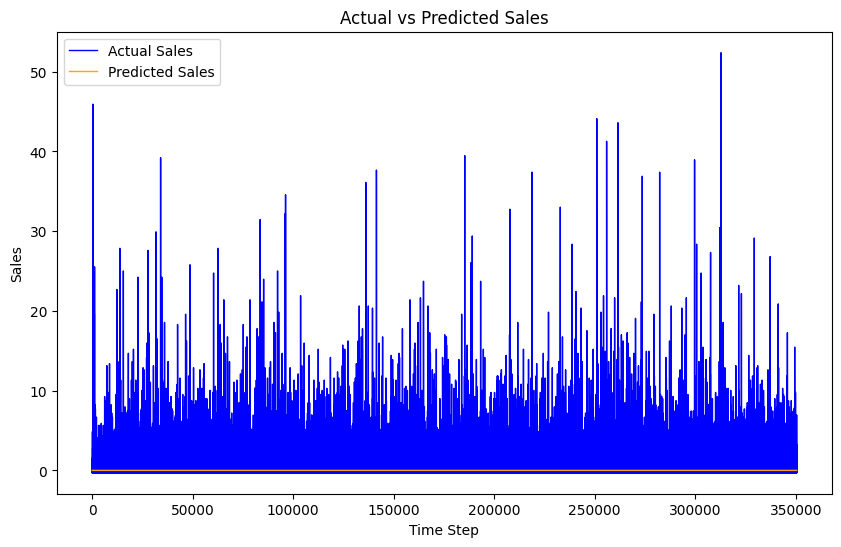

In [62]:
import matplotlib.pyplot as plt

# Flatten the predictions to ensure they match the shape of y_test
predictions_flattened = predictions.reshape(-1)

# Confirm that the shapes are now identical
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predictions_flattened: {predictions_flattened.shape}")

# Plot actual vs predicted values as line charts
plt.figure(figsize=(10, 6))

# Plot actual sales values as a line chart
plt.plot(y_test, label='Actual Sales', color='blue', linestyle='-', linewidth=1)

# Plot predicted sales values as a line chart
plt.plot(predictions_flattened, label='Predicted Sales', color='orange', linestyle='-', linewidth=1)

# Adding title and labels
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time Step')
plt.ylabel('Sales')

# Display legend
plt.legend()

# Show plot
plt.show()


In [56]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.9413483867856844
MAE: 0.40952380456877274


C:\Users\ryanb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
